# Perfume Recommender System - for products in long tail
### Team Members: Ali Sakhi Khan, Aishwarya Parida, Anmol Agrawal, Bin (Melody) Yang, Hayoung (Zoe) Kim
### Date: Oct 1, 2023

In [ ]:
!pip install pandas matplotlib seaborn wordcloud


In [5]:
import pandas as pd

# Load the data
perfume_df = pd.read_csv('merged_df.csv')

# Display basic information and first few rows of the dataset
perfume_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29793 entries, 0 to 29792
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                29793 non-null  int64  
 1   brand_name                29793 non-null  object 
 2   product_name              29793 non-null  object 
 3   price                     29793 non-null  float64
 4   total_num_reviews         29793 non-null  float64
 5   overall_review            29793 non-null  float64
 6   reviews                   29793 non-null  object 
 7   brand_product             29793 non-null  object 
 8   all_scent                 29793 non-null  object 
 9   Fragrance_Classification  29793 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.3+ MB


In [4]:
perfume_df['brand_name'].nunique(), perfume_df['product_name'].nunique()

(238, 900)

**The dataset contains 29,793 entries and 10 columns. Here is a brief overview of each column:**

- **brand_name:** The name of the perfume brand (29,793 non-null object).
- **product_name:** The name of the perfume product (29,793 non-null object).
- **price:** The price of the perfume (29,793 non-null float64).
- **total_num_reviews:** Total number of reviews for the perfume (29,793 non-null float64).
- **overall_review:** Overall review score for the perfume (29,793 non-null float64).
- **reviews:** Textual reviews from customers (29,793 non-null object).
- **brand_product:** Concatenation of brand and product name (29,793 non-null object).
- **all_scent:** Descriptions or notes of the scent (29,793 non-null object).
- **Fragrance_Classification:** Classification of the fragrance (29,793 non-null object).

In [6]:
perfume_df = perfume_df.drop('Unnamed: 0', axis=1)
perfume_df


,brand_name,product_name,price,total_num_reviews,overall_review,reviews,brand_product,all_scent,Fragrance_Classification
0,Dolce & Gabbana,Light Blue Perfume,34.60,1851.0,4.7,I would buy this fragrance again\nI use this f...,Dolce & Gabbana Light Blue Perfume,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",Eau De Toilette (EDT)
1,Dolce & Gabbana,Light Blue Perfume,34.60,1851.0,4.7,"I would love this product\nI love it, is an ev...",Dolce & Gabbana Light Blue Perfume,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",Eau De Toilette (EDT)
2,Dolce & Gabbana,Light Blue Perfume,34.60,1851.0,4.7,I would buy this product again and again\nVery...,Dolce & Gabbana Light Blue Perfume,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",Eau De Toilette (EDT)
3,Dolce & Gabbana,Light Blue Perfume,34.60,1851.0,4.7,I would buy this product again and again.\nI l...,Dolce & Gabbana Light Blue Perfume,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",Eau De Toilette (EDT)
4,Dolce & Gabbana,Light Blue Perfume,34.60,1851.0,4.7,Love the fragrance\nLove the fragrance! Will b...,Dolce & Gabbana Light Blue Perfume,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",Eau De Toilette (EDT)
...,...,...,...,...,...,...,...,...,...
29788,Reminiscence,Patchouli Blanc Perfume,59.49,18.0,4.3,"Love the scent\nThis smells amazing! sweet, fl...",Reminiscence Patchouli Blanc Perfume,"Patchouli, , ,","Perfume, Sample"
29789,Reminiscence,Patchouli Blanc Perfume,59.49,18.0,4.3,"No\nThe patch is very cheap here, doesnt worth...",Reminiscence Patchouli Blanc Perfume,"Patchouli, , ,","Perfume, Sample"
29790,Reminiscence,Patchouli Blanc Perfume,59.49,18.0,4.3,I love patchouli blanc smells wonderful ❤\nUse...,Reminiscence Patchouli Blanc Perfume,"Patchouli, , ,","Perfume, Sample"
29791,Reminiscence,Patchouli Blanc Perfume,59.49,18.0,4.3,Patchouli Blanc\nPatchouli Blanc is a lovely p...,Reminiscence Patchouli Blanc Perfume,"Patchouli, , ,","Perfume, Sample"


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

# Define custom stopwords
custom_stopwords = ["would", "line", "bottom", "yes", "not", "perfume", "fragrance", "scent", "smell",
                    "product", "very", "so", "use", "no", "all", "one", "will", "smells", "time", "just",
                    "get", "when"]

# Add custom stopwords to NLTK's English stopwords
all_stopwords = stopwords.words('english') + custom_stopwords

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in all_stopwords]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into a string
    text = ' '.join(words)
    return text

# Apply text preprocessing to the 'reviews' and 'all_scent' columns
perfume_df['cleaned_reviews'] = perfume_df['reviews'].apply(preprocess_text)
perfume_df['cleaned_all_scent'] = perfume_df['all_scent'].apply(preprocess_text)

# Display the original and cleaned text for comparison
perfume_df[['reviews', 'cleaned_reviews', 'all_scent', 'cleaned_all_scent']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,reviews,cleaned_reviews,all_scent,cleaned_all_scent
0,I would buy this fragrance again\nI use this f...,buy standard light blue go almost everything u...,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",citrus sicilian lemon apple cedar bellflower b...
1,"I would love this product\nI love it, is an ev...",love love everyday wearing recommend friend,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",citrus sicilian lemon apple cedar bellflower b...
2,I would buy this product again and again\nVery...,buy satisfied like light blue package came per...,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",citrus sicilian lemon apple cedar bellflower b...
3,I would buy this product again and again.\nI l...,buy love great price fast delivery recommend f...,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",citrus sicilian lemon apple cedar bellflower b...
4,Love the fragrance\nLove the fragrance! Will b...,love love buy recommend friend,"Citrus, Sicilian Lemon, Apple, Cedar, Bellflow...",citrus sicilian lemon apple cedar bellflower b...


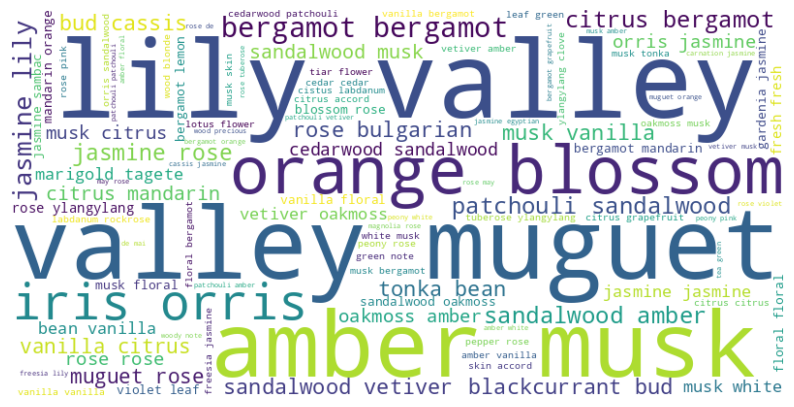

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Concatenate all the scent descriptions into one text
all_scent_text = ' '.join(perfume_df['cleaned_all_scent'])

# Generate a word cloud for all_scent
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_scent_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud of Scent Descriptions', fontsize=16)
plt.show()


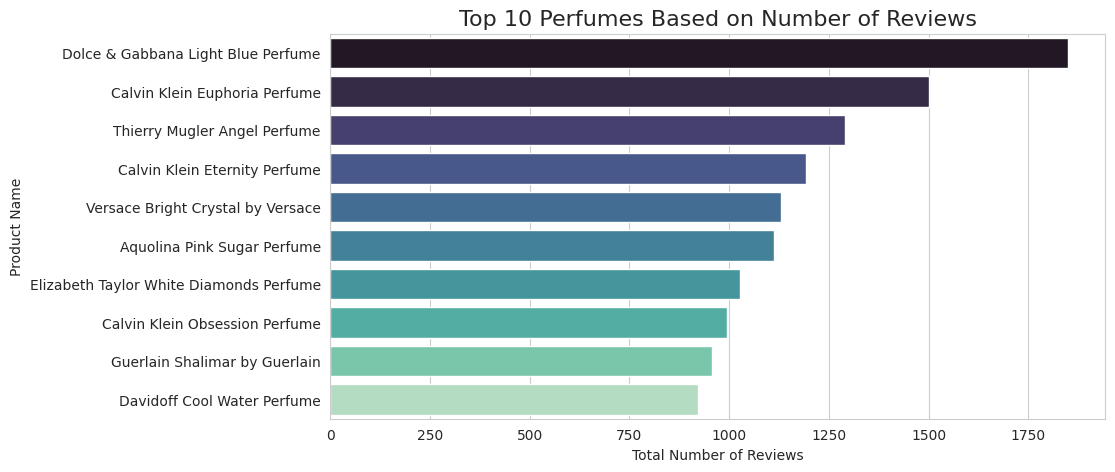

In [13]:
# Top 10 products based on the number of reviews
top_products = perfume_df.groupby('brand_product')['total_num_reviews'].max().sort_values(ascending=False).head(10)

# Bar plot for top 10 products
plt.figure(figsize=(10, 5))
sns.barplot(y=top_products.index, x=top_products.values, palette="mako")
plt.title('Top 10 Perfumes Based on Number of Reviews', fontsize=16)
plt.xlabel('Total Number of Reviews')
plt.ylabel('Product Name')
plt.show()


In [ ]:
!pip install bertopic
!pip install bertopic[visualization]
!pip install bertopic[spacy]

In [16]:
from bertopic import BERTopic


In [17]:
# Load data
# df = pd.read_csv('df_new.csv')

# If data is large, you might select a subset to speed up modeling during testing
# df = df.sample(6000)

# Add words that are not informative about topics

# Initialize the BERTopic model
model = BERTopic(verbose=True, nr_topics='Auto')

# Convert the 'reviews' column to a list
docs = perfume_df['cleaned_reviews'].to_list()

# Fit the BERTopic model to your data
topics, probabilities = model.fit_transform(docs)

# Display the topic frequencies
print(model.get_topic_freq().head())


Batches:   0%|          | 0/932 [00:00<?, ?it/s]

2023-10-12 12:50:49,669 - BERTopic - Transformed documents to Embeddings
2023-10-12 12:51:55,558 - BERTopic - Reduced dimensionality
2023-10-12 12:52:00,117 - BERTopic - Clustered reduced embeddings
2023-10-12 12:52:02,129 - BERTopic - Reduced number of topics from 350 to 12


   Topic  Count
1      0  19541
0     -1  10016
2      1     99
3      2     25
4      3     17


In [18]:
# Visualize the topics
model.visualize_barchart()

In [20]:
model.visualize_topics()


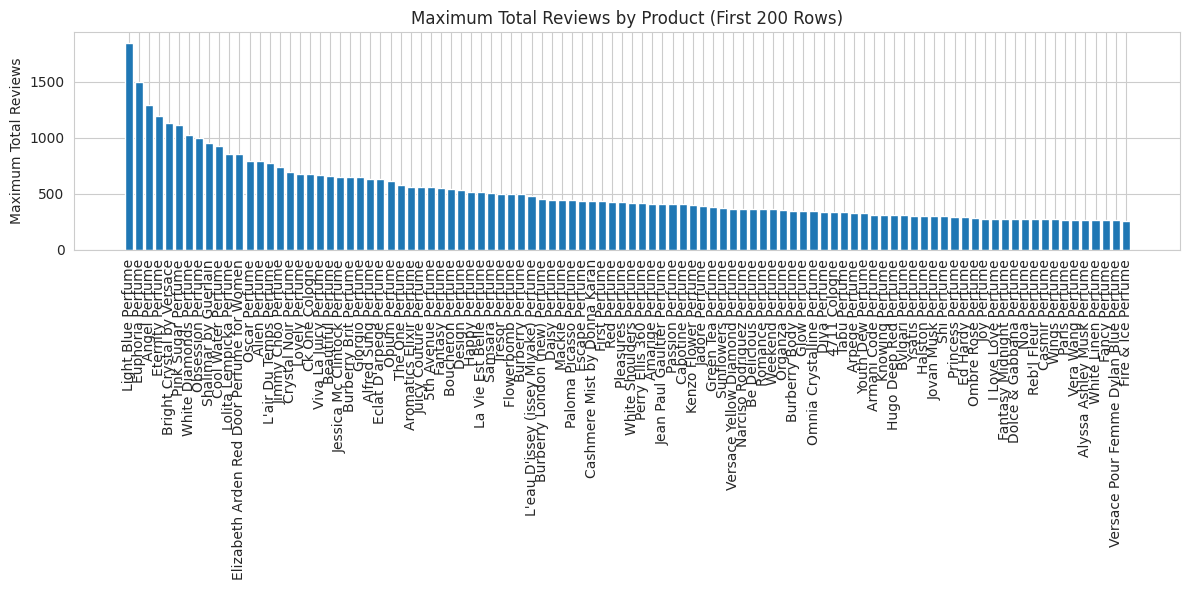

In [30]:
df=pd.read_csv('merged_df.csv')
df_cleaned = df[['product_name', 'total_num_reviews']].dropna()

# Create a pivot table with the maximum total review for each product
pivot_table = df_cleaned.groupby('product_name')['total_num_reviews'].max().reset_index()

p = pivot_table.sort_values(by='total_num_reviews',ascending=False)
p

# Calculate the threshold for 10% of the max total reviews
threshold = 0.10 * p['total_num_reviews'].max()

# Create a new DataFrame containing products with less than 10% of the max total reviews
filtered_products = p[p['total_num_reviews'] < threshold]

# Display the products that meet the constraint
filtered_products

import matplotlib.pyplot as plt

# Select the first 200 rows
first_200 = p.head(100)

# Plot the graph for the first 200 rows
plt.figure(figsize=(12, 6))
plt.bar(first_200['product_name'], first_200['total_num_reviews'])
plt.xticks(rotation=90)
plt.ylabel('Maximum Total Reviews')
plt.title('Maximum Total Reviews by Product (First 200 Rows)')
plt.tight_layout()
plt.show()

In [31]:
from collections import Counter
# Create a set of unique words for each review
perfume_df['unique_words'] = perfume_df['cleaned_reviews'].apply(lambda x: set(x.split()))

# Perform word frequency analysis on the preprocessed reviews using unique words from each review
unique_word_frequency = Counter()
for word_set in perfume_df['unique_words']:
    unique_word_frequency.update(word_set)

# Create a DataFrame from the word frequency data
word_freq_df = pd.DataFrame(list(unique_word_frequency.items()), columns=['word', 'frequency'])
# Sort the words by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)
word_freq_df[:50]


,word,frequency
2,recommend,28057
4,friend,28032
11,love,10654
5,buy,7104
38,great,4973
17,like,4182
229,good,3307
198,day,3094
59,compliment,2767
24,year,2632


In [32]:
# Add a new column to the DataFrame which calculates the percentage of total reviews for each product
# relative to the maximum number of reviews in the entire dataset.
perfume_df['review_percentage'] = perfume_df['total_num_reviews'] / max(perfume_df['total_num_reviews']) * 100

# Filter the DataFrame to include only those products that fall into the long tail, i.e.,
# those that have a total number of reviews less than or equal to 185.
longtail_df = perfume_df[perfume_df['total_num_reviews'] <= 185]

# Display the long tail DataFrame (optional, depending on your need to visualize the data at this point).
longtail_df

# Display the number of unique product names in the long tail DataFrame.
longtail_df['product_name'].nunique()

753

In [33]:
# Further filter the long tail DataFrame to include only those products
# that have an overall review score greater than or equal to 4.5.
longtail_df = longtail_df[longtail_df['overall_review'] >= 4.5]

# Display the further filtered long tail DataFrame (optional).
longtail_df

# Display the number of unique product names in the filtered long tail DataFrame.
longtail_df['product_name'].nunique()


524

In [34]:
# Add a new column 'review_scent' to the DataFrame 'longtail_df'.
# This new column concatenates the 'cleaned_all_scent' and 'cleaned_reviews' columns,
# providing a unified text field that combines both scent descriptions and reviews.
longtail_df['review_scent'] = longtail_df['cleaned_all_scent'] + ' ' + longtail_df['cleaned_reviews']
longtail_df

,brand_name,product_name,price,total_num_reviews,overall_review,reviews,brand_product,all_scent,Fragrance_Classification,cleaned_reviews,cleaned_all_scent,unique_words,review_percentage,review_scent
1340,Jimmy Choo,Jimmy Choo Blossom Perfume,45.41,181.0,4.6,"Yes\nI love th e smell,and how it blend with m...",Jimmy Choo Jimmy Choo Blossom Perfume,"Citrus, , ,",Perfume,love th e smelland blend chemistry recommend f...,citrus,"{love, recommend, friend, blend, chemistry, th...",9.778498,citrus love th e smelland blend chemistry reco...
1341,Jimmy Choo,Jimmy Choo Blossom Perfume,45.41,181.0,4.6,Jimmy Choo Blossom\nI've found for some time n...,Jimmy Choo Jimmy Choo Blossom Perfume,"Citrus, , ,",Perfume,jimmy choo blossom ive found many perfume love...,citrus,"{last, delivery, recommend, friend, dont, jimm...",9.778498,citrus jimmy choo blossom ive found many perfu...
1342,Jimmy Choo,Jimmy Choo Blossom Perfume,45.41,181.0,4.6,Sweet and Fruity\nThis is a fun fruity sweet f...,Jimmy Choo Jimmy Choo Blossom Perfume,"Citrus, , ,",Perfume,sweet fruity fun fruity sweet ive seen jimmy c...,citrus,"{blossom, hour, sweet, lasted, punchy, ive, de...",9.778498,citrus sweet fruity fun fruity sweet ive seen ...
1343,Jimmy Choo,Jimmy Choo Blossom Perfume,45.41,181.0,4.6,I would buy your products again\nLoved the fra...,Jimmy Choo Jimmy Choo Blossom Perfume,"Citrus, , ,",Perfume,buy product loved favorite recommend friend,citrus,"{recommend, friend, product, favorite, loved, ...",9.778498,citrus buy product loved favorite recommend fr...
1344,Jimmy Choo,Jimmy Choo Blossom Perfume,45.41,181.0,4.6,I took a chance and was not disappointed... I ...,Jimmy Choo Jimmy Choo Blossom Perfume,"Citrus, , ,",Perfume,took chance disappointed love jimm feel best p...,citrus,"{love, feel, shower, add, recommend, friend, j...",9.778498,citrus took chance disappointed love jimm feel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29742,Bvlgari,Petits Et Mamans Perfume,63.43,74.0,4.5,One of the best testers here!\nIf you wanna sm...,Bvlgari Petits Et Mamans Perfume,"Floral, Bergamot, Sweet orange, Rosewood, Rose...","Perfume, Mini, Gift Set, Shower Gel, Body Loti...",best tester wanna like baby thanks fragx conti...,floral bergamot sweet orange rosewood rose egl...,"{la, superb, xmonth, youre, like, usually, ph,...",3.997839,floral bergamot sweet orange rosewood rose egl...
29743,Bvlgari,Petits Et Mamans Perfume,63.43,74.0,4.5,The Smell of This Fragrance is Divine!\nI got ...,Bvlgari Petits Et Mamans Perfume,"Floral, Bergamot, Sweet orange, Rosewood, Rose...","Perfume, Mini, Gift Set, Shower Gel, Body Loti...",divine got small sample many year ago hell fin...,floral bergamot sweet orange rosewood rose egl...,"{sister, many, divine, recognized, small, gave...",3.997839,floral bergamot sweet orange rosewood rose egl...
29744,Bvlgari,Petits Et Mamans Perfume,63.43,74.0,4.5,"i like this fragrance\nits my favourite , its ...",Bvlgari Petits Et Mamans Perfume,"Floral, Bergamot, Sweet orange, Rosewood, Rose...","Perfume, Mini, Gift Set, Shower Gel, Body Loti...",like favourite long lasting recommend friend,floral bergamot sweet orange rosewood rose egl...,"{recommend, friend, lasting, like, favourite, ...",3.997839,floral bergamot sweet orange rosewood rose egl...
29745,Bvlgari,Petits Et Mamans Perfume,63.43,74.0,4.5,Very nice\nI love this perfume\n\n\nBottom Lin...,Bvlgari Petits Et Mamans Perfume,"Floral, Bergamot, Sweet orange, Rosewood, Rose...","Perfume, Mini, Gift Set, Shower Gel, Body Loti...",nice love recommend friend,floral bergamot sweet orange rosewood rose egl...,"{love, recommend, nice, friend}",3.997839,floral bergamot sweet orange rosewood rose egl...


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:

a=input("Enter Notes\n")
b=input("Enter Event\n")
max_price=float(input(("Enter the maximum Price\n")))
attributes=[]
attributes.append(a)
attributes.append(b)

#attributes = ['fresh', 'price', 'everyday']
attributes = [attr.lower() for attr in attributes]
#attributes

Enter Notes
fresh
Enter Event
everyday
Enter the maximum Price
55


In [37]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine the customer attributes into a single string
attribute_string = ' '.join(attributes)

# Vectorize the reviews and the attribute
vectorizer = CountVectorizer().fit_transform([attribute_string] + longtail_df['review_scent'].tolist())
vectors = vectorizer.toarray()

# Get the vector for the attribute and the matrix for the reviews
attribute_vector = vectors[0].reshape(1, -1)
reviews_matrix = vectors[1:]

# Calculate cosine similarity between the attribute and each review
cosine_similarities = cosine_similarity(attribute_vector, reviews_matrix).flatten()

# Add the similarity scores to the dataframe
longtail_df['similarity_score_bow'] = cosine_similarities

# Check the first few rows with similarity scores
longtail_df[['brand_product','review_scent','similarity_score_bow']].sort_values(by='similarity_score_bow',ascending=False)

,brand_product,review_scent,similarity_score_bow
29162,Frederic Malle Portrait Of A Lady Perfume,fresh everyday recommend friend,0.707107
28226,Abercrombie & Fitch First Instinct Perfume,fresh lonely fresh everyday wear light floral ...,0.639602
24922,Marc Jacobs Marc Jacobs Honey Perfume,fresh love everyday recommend friend,0.632456
9440,Estee Lauder Modern Muse Perfume,rose fresh repeated purchase fresh love jasmin...,0.612372
8953,Juicy Couture Viva La Juicy Gold Couture Perfume,fresh wife like everyday recommend friend,0.577350
...,...,...,...
14098,Montana Montana Perfume,spicy using since extremely loyal brand easy f...,0.000000
14099,Montana Montana Perfume,spicy parfum good good recommend friend,0.000000
14100,Montana Montana Perfume,spicy used year last day overpowering recommen...,0.000000
14101,Montana Montana Perfume,spicy ok wont replace chloe looking,0.000000


In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
longtail_df['sentiment_score'] = longtail_df['reviews'].apply(
    lambda x: sid.polarity_scores(str(x))['compound'] if isinstance(x, str) else 0
)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [40]:
# Calculate the evaluation score
longtail_df['evaluation_score_bow'] = longtail_df['similarity_score_bow'] * longtail_df['sentiment_score']

# Group by product_name and sum the evaluation scores for each product
product_scores = longtail_df.groupby('brand_product')['evaluation_score_bow'].mean().reset_index()

# Recommend the top 3 products based on evaluation score
top_3_products_bow = product_scores.sort_values(by='evaluation_score_bow', ascending=False).head(3)
top_3_products_bow


,brand_product,evaluation_score_bow
6,Abercrombie & Fitch First Instinct Perfume,0.344990
99,Clean Clean Fresh Linens Perfume,0.258559
398,Parfums De Coeur Designer Imposters Wanna Play...,0.246057


In [41]:
# Compute the average rating, similarity score, and sentiment score for each product
average_scores = longtail_df.groupby('brand_product').agg({
    'overall_review': 'mean',
    'similarity_score_bow': 'mean',
    'sentiment_score': 'mean',
    'price':'mean'
}).reset_index()

# Merge the average scores with top_3_products_bow DataFrame
top_3_with_avg_scores_bow = pd.merge(top_3_products_bow, average_scores, on='brand_product')

# Display the result
top_3_with_avg_scores_bow

,brand_product,evaluation_score_bow,overall_review,similarity_score_bow,sentiment_score,price
0,Abercrombie & Fitch First Instinct Perfume,0.344990,4.7,0.388237,0.898300,34.60
1,Clean Clean Fresh Linens Perfume,0.258559,4.7,0.274299,0.937900,16.99
2,Parfums De Coeur Designer Imposters Wanna Play...,0.246057,4.7,0.293460,0.788125,5.09


In [ ]:
!python -m spacy download en_core_web_md

In [43]:
import spacy

# Load the medium-sized model with word vectors
nlp = spacy.load('en_core_web_md')

# Function to get vector representation of text using spaCy
def get_spacy_vector(text):
    return nlp(text).vector

# Use the function to get vectors for all  reviews
vectors = [get_spacy_vector(review) for review in longtail_df['reviews'] if review]

In [44]:
import numpy as np
# Convert the attribute_string into a numerical vector using word2vec.
# This creates a numerical representation of the provided text.
attribute_vectors = get_spacy_vector(attribute_string)
# Convert the list of vectors into a NumPy array for efficient numerical operations.
vectors_np = np.array(vectors)
# Calculate the cosine similarity between the attribute vector and all other vectors.
# - `attribute_vectors.reshape(1, -1)`: Reshapes the attribute vector for compatibility in similarity computation.
# - `vectors_np`: Contains the vectors to be compared with the attribute vector.
similarity_scores = cosine_similarity(attribute_vectors.reshape(1, -1), vectors_np)
similarity_scores_flat = similarity_scores.flatten()
longtail_df['similarity_score_word2vec'] = similarity_scores_flat
longtail_df[['brand_product','reviews','similarity_score_bow','similarity_score_word2vec','price']].sort_values(by='similarity_score_word2vec',ascending=False)

,brand_product,reviews,similarity_score_bow,similarity_score_word2vec,price
28394,Bvlgari Bvlgari Eau Parfumee (green Tea) Cologne,happy with my purchase\ngreat smell fresh will...,0.158114,0.729330,86.50
29519,Guerlain Aqua Allegoria Herba Fresca Perfume,love this fragrance. very ...\nlove this fragr...,0.176777,0.727860,93.70
18616,Marc Jacobs Daisy Dream Perfume,Fresh and citrusy\nI love it its different and...,0.471405,0.724902,86.50
16383,Versace Versace Versense Perfume,Surprised mix herbal and zesty\nEvery day,0.000000,0.716991,60.55
9546,Clean Clean Warm Cotton Perfume,Smells like clean\nYou will just smell clean j...,0.000000,0.709195,41.08
...,...,...,...,...,...
14716,Prada Prada Infusion D'iris Perfume,Goooood\nGoooood,0.000000,0.000000,108.12
15692,Calvin Klein Ck One Shock Perfume,Goooood\nGooood,0.000000,0.000000,23.77
14249,Carolina Herrera 212 Sexy Perfume,Love😂\nLoved❤️,0.000000,-0.009914,36.34
21170,Narciso Rodriguez Narciso Rodriguez Fleur Musc...,Yes\nGreer,0.000000,-0.012325,86.50


In [45]:
# Calculate the evaluation score using word2vec similarity scores
longtail_df['evaluation_score_word2vec'] = longtail_df['similarity_score_word2vec'] * longtail_df['sentiment_score']

# Group by product_name and sum the evaluation scores for each product using word2vec
product_scores_word2vec = longtail_df.groupby('brand_product')['evaluation_score_word2vec'].mean().reset_index()

# Recommend the top 3 products based on word2vec evaluation score
top_3_products_word2vec = product_scores_word2vec.sort_values(by='evaluation_score_word2vec', ascending=False).head(3)
top_3_products_word2vec

,brand_product,evaluation_score_word2vec
284,Lalique Lalique Amethyst Exquise Perfume,0.605951
419,Philosophy Pure Grace Nude Rose Perfume,0.582778
418,Philosophy Fresh Cream Perfume,0.581999


In [46]:
# Compute the average rating, similarity score (word2vec), and sentiment score for each product
average_scores_word2vec = longtail_df.groupby('brand_product').agg({
    'overall_review': 'mean',
    'similarity_score_word2vec': 'mean',
    'sentiment_score': 'mean',
    'price':'mean'
}).reset_index()

# Merge the average scores with top_3_products_word2vec DataFrame
top_3_with_avg_scores_word2vec = pd.merge(top_3_products_word2vec, average_scores_word2vec, on='brand_product')
# Display the result
top_3_with_avg_scores_word2vec

,brand_product,evaluation_score_word2vec,overall_review,similarity_score_word2vec,sentiment_score,price
0,Lalique Lalique Amethyst Exquise Perfume,0.605951,5.0,0.619202,0.97860,50.99
1,Philosophy Pure Grace Nude Rose Perfume,0.582778,5.0,0.607342,0.95960,33.99
2,Philosophy Fresh Cream Perfume,0.581999,5.0,0.621587,0.93722,42.49


In [48]:
# Filter and select rows from the DataFrame 'top_3_with_avg_scores_word2vec' where the 'price' column
# is less than or equal to a user-defined variable 'max_price'.
# This step ensures that the resulting DataFrame only contains perfumes that are within the user's budget.
top_3_with_avg_scores_word2vec[top_3_with_avg_scores_word2vec['price']<=max_price]

,brand_product,evaluation_score_word2vec,overall_review,similarity_score_word2vec,sentiment_score,price
0,Lalique Lalique Amethyst Exquise Perfume,0.605951,5.0,0.619202,0.97860,50.99
1,Philosophy Pure Grace Nude Rose Perfume,0.582778,5.0,0.607342,0.95960,33.99
2,Philosophy Fresh Cream Perfume,0.581999,5.0,0.621587,0.93722,42.49


In [49]:
top_3_with_avg_scores_bow

,brand_product,evaluation_score_bow,overall_review,similarity_score_bow,sentiment_score,price
0,Abercrombie & Fitch First Instinct Perfume,0.344990,4.7,0.388237,0.898300,34.60
1,Clean Clean Fresh Linens Perfume,0.258559,4.7,0.274299,0.937900,16.99
2,Parfums De Coeur Designer Imposters Wanna Play...,0.246057,4.7,0.293460,0.788125,5.09


In [53]:
# Extract the 'brand_product' column from the DataFrame 'top_3_products_bow' and convert it into a list.
recommended_perfume = top_3_products_bow['brand_product'].tolist()

# Filter 'longtail_df' to keep only those rows where the 'brand_product' is in the 'recommended_perfume' list.
# 'filtered_reviews' will contain only the reviews related to the recommended perfumes.
filtered_reviews = longtail_df[longtail_df['brand_product'].isin(recommended_perfume)]

# This will be used to store the percentage of reviews mentioning each attribute for each perfume.
attribute_mentions = {perfume: {attribute: 0 for attribute in attributes} for perfume in recommended_perfume}

# Loop through each recommended perfume.
for perfume in recommended_perfume:
    # Filter 'filtered_reviews' to keep only those rows related to the current 'perfume'.
    perfume_reviews = filtered_reviews[filtered_reviews['brand_product'] == perfume]
    # Get the total number of reviews for the current 'perfume'.
    total_reviews = len(perfume_reviews)

    # Loop through each attribute.
    for attribute in attributes:
        # Count the number of reviews for the current 'perfume' that mention the current 'attribute'.
        # Convert the count to a percentage of the total reviews for the 'perfume'.
        # If 'total_reviews' is 0, avoid division by zero by setting 'mention_percentage' to 0.
        mentions_count = perfume_reviews['cleaned_reviews'].apply(lambda x: attribute in x).sum()
        mention_percentage = (mentions_count / total_reviews) * 100 if total_reviews > 0 else 0
        # Store the 'mention_percentage' in the 'attribute_mentions' dictionary.
        attribute_mentions[perfume][attribute] = mention_percentage

# Convert the 'attribute_mentions' dictionary to a DataFrame for easier viewing and analysis.
# Transpose the DataFrame so that perfumes are the rows and attributes are the columns.
attribute_mentions_df = pd.DataFrame(attribute_mentions).T

# Display the DataFrame 'attribute_mentions_df' (optional).
attribute_mentions_df

,fresh,everyday
Abercrombie & Fitch First Instinct Perfume,33.333333,16.666667
Clean Clean Fresh Linens Perfume,66.666667,16.666667
Parfums De Coeur Designer Imposters Wanna Play? Perfume,0.000000,16.666667


In [57]:
# Extract the 'brand_product' column from the DataFrame 'top_3_products_word2vec' and convert it to a list.
# This list, 'recommended_perfume_word2vec', contains the names of the recommended perfumes based on a Word2Vec model (presumed).
recommended_perfume_word2vec = top_3_products_word2vec['brand_product'].tolist()

# Filter 'longtail_df' to keep only those rows where the 'brand_product' is in the 'recommended_perfume_word2vec' list.
# 'filtered_reviews_word2vec' will contain only the reviews related to the recommended perfumes according to the Word2Vec model.
filtered_reviews_word2vec = longtail_df[longtail_df['brand_product'].isin(recommended_perfume_word2vec)]

# Initialize a nested dictionary 'attribute_mentions_word2vec' with perfumes as the outer keys,
# and attributes as the inner keys, initializing all values to 0.
# This will be used to store the percentage of reviews mentioning each attribute for each perfume.
attribute_mentions_word2vec = {perfume: {attribute: 0 for attribute in attributes} for perfume in recommended_perfume_word2vec}

# Loop through each recommended perfume.
for perfume in recommended_perfume_word2vec:
    # Filter 'filtered_reviews_word2vec' to keep only those rows related to the current 'perfume'.
    perfume_reviews_word2vec = filtered_reviews_word2vec[filtered_reviews_word2vec['brand_product'] == perfume]
    # Get the total number of reviews for the current 'perfume'.
    total_reviews_word2vec = len(perfume_reviews_word2vec)

    # Loop through each attribute.
    for attribute in attributes:
        # Count the number of reviews for the current 'perfume' that mention the current 'attribute'.
        # Convert the count to a percentage of the total reviews for the 'perfume'.
        # If 'total_reviews_word2vec' is 0, avoid division by zero by setting 'mention_percentage_word2vec' to 0.
        mentions_count_word2vec = perfume_reviews_word2vec['cleaned_reviews'].apply(lambda x: attribute in x).sum()
        mention_percentage_word2vec = (mentions_count_word2vec / total_reviews_word2vec) * 100 if total_reviews_word2vec > 0 else 0
        # Store the 'mention_percentage_word2vec' in the 'attribute_mentions_word2vec' dictionary.
        attribute_mentions_word2vec[perfume][attribute] = mention_percentage_word2vec

# Convert the 'attribute_mentions_word2vec' dictionary to a DataFrame for easier viewing and analysis.
# Transpose the DataFrame so that perfumes are the rows and attributes are the columns.
attribute_mentions_df_word2vec = pd.DataFrame(attribute_mentions_word2vec).T

# Display the DataFrame 'attribute_mentions_df_word2vec' (optional).
attribute_mentions_df_word2vec


,fresh,everyday
Lalique Lalique Amethyst Exquise Perfume,0.0,0.0
Philosophy Pure Grace Nude Rose Perfume,0.0,50.0
Philosophy Fresh Cream Perfume,20.0,0.0


In [56]:
longtail_df[longtail_df['brand_product']=='Lalique Lalique Amethyst Exquise Perfume']

,brand_name,product_name,price,total_num_reviews,overall_review,reviews,brand_product,all_scent,Fragrance_Classification,cleaned_reviews,cleaned_all_scent,unique_words,review_percentage,review_scent,similarity_score_bow,sentiment_score,evaluation_score_bow,similarity_score_word2vec,evaluation_score_word2vec
28767,Lalique,Lalique Amethyst Exquise Perfume,50.99,1.0,5.0,Beautiful berry\nVery different than what I ex...,Lalique Lalique Amethyst Exquise Perfume,"Vanilla, , ,",Perfume,beautiful berry different expected beautiful n...,vanilla,"{expected, girl, flexible, beautiful, vibe, be...",0.054025,vanilla beautiful berry different expected bea...,0.0,0.9786,0.0,0.619202,0.605951
